In [3]:
'''
The goal of this section is to implement an SVM on my skincare dataset. 
'''

'\nThe goal of this section is to implement an SVM on my skincare dataset. \n'

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
product_dfv1=pd.read_csv("https://github.com/Vakiti/SkinTelligence-Navigating-The-Amazon-Skincare-Universe/raw/datasets/Cleaned_DT_Input.csv")
product_dfv1

,product_name,price,listPrice,rating,totalReviews,product_company,isPrimeEligible,Category,rating_category,category_encoded,rating_numeric
0,yopela 14 pack natural lip balm in bulk with ...,5.59,10.90,4.3,311.0,yopela,1.0,lipbalm,High,11,4
1,#ootd vegan hydrating korean face mask sheet p...,33.90,39.21,4.5,381.0,#ootd,1.0,sheet mask,High,14,4
2,beauty of joseon centella asiatica calming mas...,15.52,25.00,4.5,135.0,beauty of joseon,1.0,sheet mask,High,14,4
3,beauty of joseon radiance cleansing balm (100m...,17.10,19.00,4.6,302.0,beauty of joseon,1.0,cleansing oil,VeryHigh,4,5
4,cosrx salicylic acid daily gentle cleanser 150...,13.99,19.30,4.6,1581.0,cosrx,1.0,cleanser,VeryHigh,2,5
...,...,...,...,...,...,...,...,...,...,...,...
1199,zeoclay face mask - 100% organic spa quality -...,38.24,44.99,5.0,20.0,zeoclay,1.0,clay mask,VeryHigh,1,5
1200,zo skin health gentle cleanser 6.7 fl. oz.,36.90,40.97,4.7,606.0,zo skin health,1.0,cleanser,VeryHigh,2,5
1201,zum face sugar facial scrub - lemongrass - 4 oz,15.25,20.56,4.5,166.0,zum,1.0,face scrub,High,10,4
1202,𝗧𝗢𝗣 𝟮𝟬𝟮𝟯* hyaluronic acid face serum - 2.5% pu...,9.99,11.99,4.3,24024.0,eclat skincare,1.0,serum,High,13,4


In [3]:
print(product_dfv1.isna().sum())
print('\n' + str(product_dfv1.info()))

product_name        0
price               0
listPrice           0
rating              0
totalReviews        0
product_company     0
isPrimeEligible     0
Category            0
rating_category     0
category_encoded    0
rating_numeric      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      1204 non-null   object 
 1   price             1204 non-null   float64
 2   listPrice         1204 non-null   float64
 3   rating            1204 non-null   float64
 4   totalReviews      1204 non-null   float64
 5   product_company   1204 non-null   object 
 6   isPrimeEligible   1204 non-null   float64
 7   Category          1204 non-null   object 
 8   rating_category   1204 non-null   object 
 9   category_encoded  1204 non-null   int64  
 10  rating_numeric    1204 non-null   int64  
dtypes: float64(5), int64(2

In [7]:
# Load the dataset
# Assuming df is your DataFrame with the skincare product data
# Adjust column names and preprocessing steps as needed
X = product_dfv1[['price', 'listPrice', 'rating', 'totalReviews', 'isPrimeEligible']]
y = product_dfv1['isPrimeEligible']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the kernels and C values to try
kernels = ['linear', 'rbf', 'poly']
C_values = [1, 10, 100]

In [ ]:
# Initialize a dictionary to store results for each kernel
results = {}

# Loop over kernels
for kernel in kernels:
    # Initialize a dictionary for results with this kernel
    kernel_results = {}
    
    # Loop over C values
    for C in C_values:
        # Initialize SVM classifier
        svm_classifier = SVC(kernel=kernel, C=C)
        
        # Train the model
        svm_classifier.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = svm_classifier.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Save results in the dictionary
        kernel_results[C] = {'Accuracy': accuracy, 'ConfusionMatrix': conf_matrix}
    
    # Save results for this kernel in the main dictionary
    results[kernel] = kernel_results


Results for linear kernel:

C = 1:
Accuracy: 0.975
Confusion Matrix:
[[  8   6]
 [  0 227]]

C = 10:
Accuracy: 0.975
Confusion Matrix:
[[  8   6]
 [  0 227]]

C = 100:
Accuracy: 0.975
Confusion Matrix:
[[  8   6]
 [  0 227]]


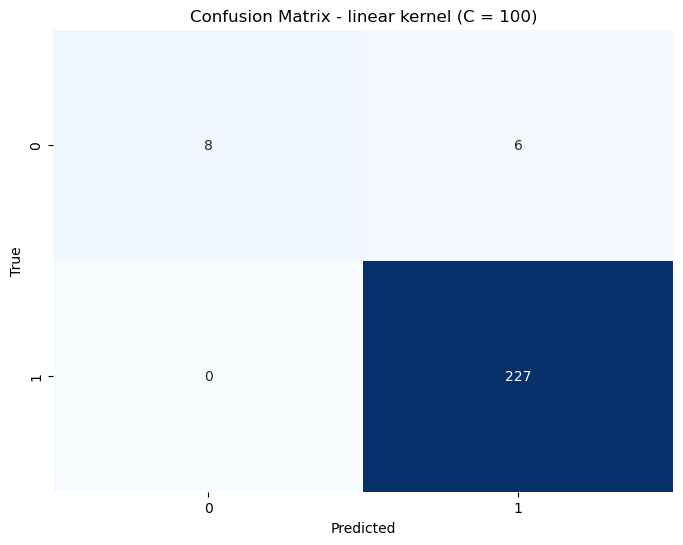


Results for rbf kernel:

C = 1:
Accuracy: 0.942
Confusion Matrix:
[[  0  14]
 [  0 227]]

C = 10:
Accuracy: 0.942
Confusion Matrix:
[[  0  14]
 [  0 227]]

C = 100:
Accuracy: 0.942
Confusion Matrix:
[[  0  14]
 [  0 227]]


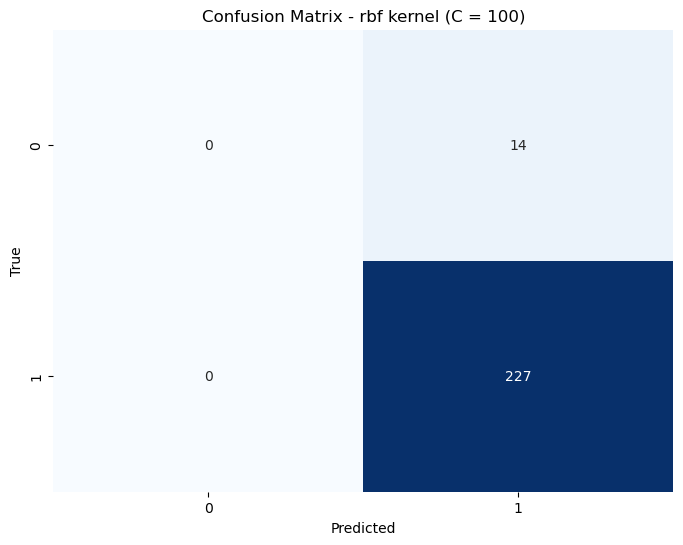


Results for poly kernel:

C = 1:
Accuracy: 0.942
Confusion Matrix:
[[  0  14]
 [  0 227]]

C = 10:
Accuracy: 0.942
Confusion Matrix:
[[  0  14]
 [  0 227]]

C = 100:
Accuracy: 0.942
Confusion Matrix:
[[  0  14]
 [  0 227]]


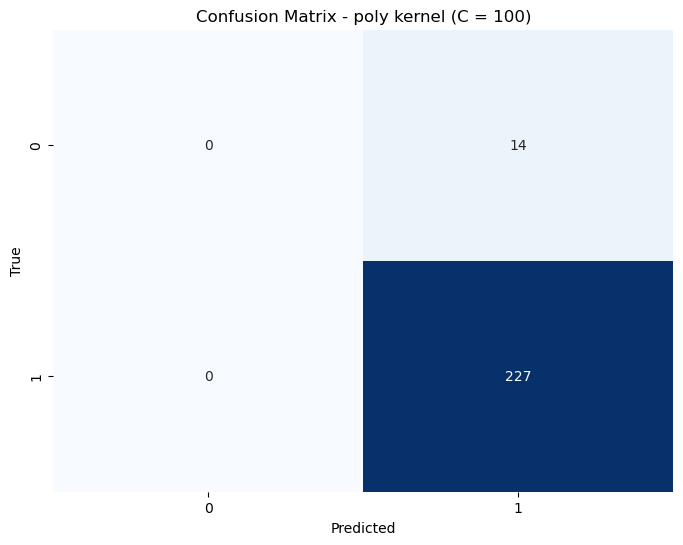

In [23]:
# Compare results and visualize
for kernel, kernel_results in results.items():
    print(f"\nResults for {kernel} kernel:")
    for C, metrics in kernel_results.items():
        print(f"\nC = {C}:")
        print(f"Accuracy: {metrics['Accuracy']:.3f}")
        print("Confusion Matrix:")
        print(metrics['ConfusionMatrix'])
        
    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['ConfusionMatrix'], annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title(f'Confusion Matrix - {kernel} kernel (C = {C})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

C:\Users\vakit\AppData\Local\Temp\ipykernel_26636\2642946139.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')


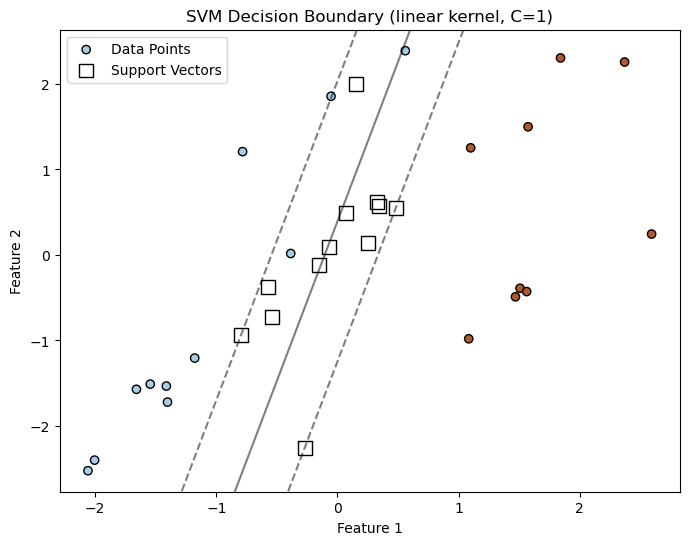

C:\Users\vakit\AppData\Local\Temp\ipykernel_26636\2642946139.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')


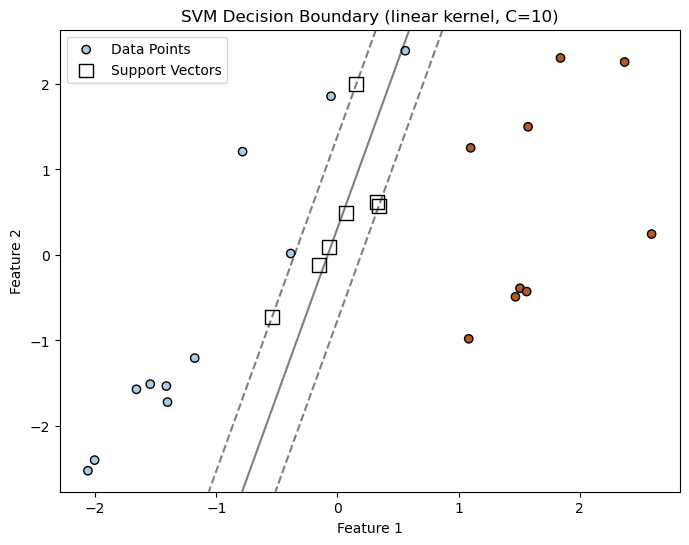

C:\Users\vakit\AppData\Local\Temp\ipykernel_26636\2642946139.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')


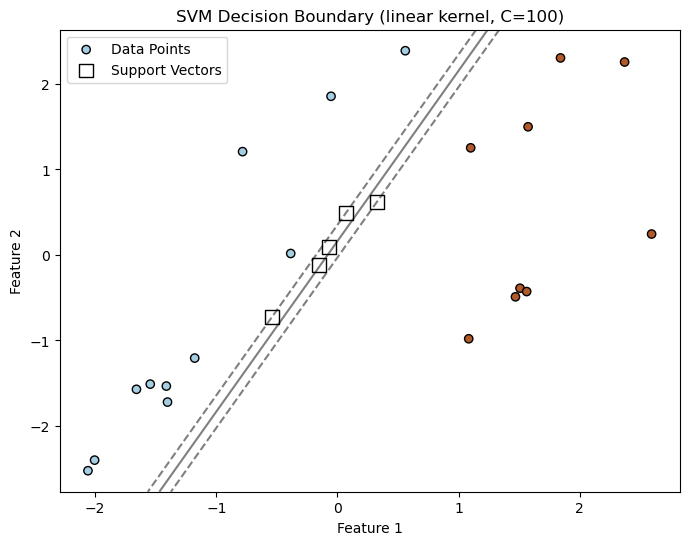

C:\Users\vakit\AppData\Local\Temp\ipykernel_26636\2642946139.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')


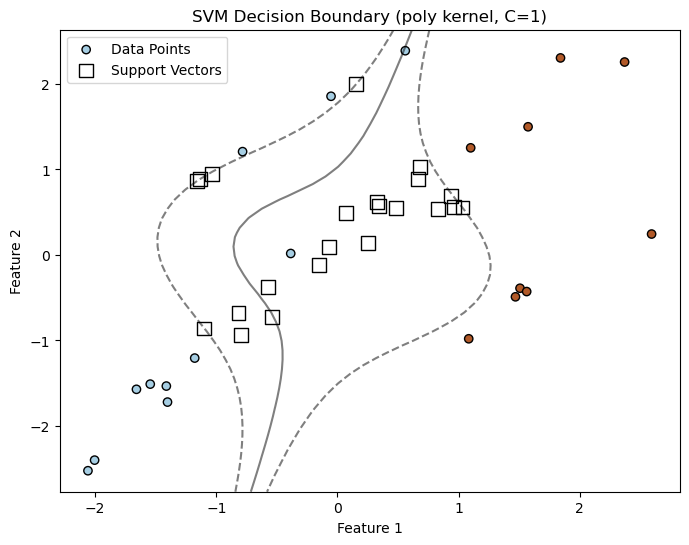

C:\Users\vakit\AppData\Local\Temp\ipykernel_26636\2642946139.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')


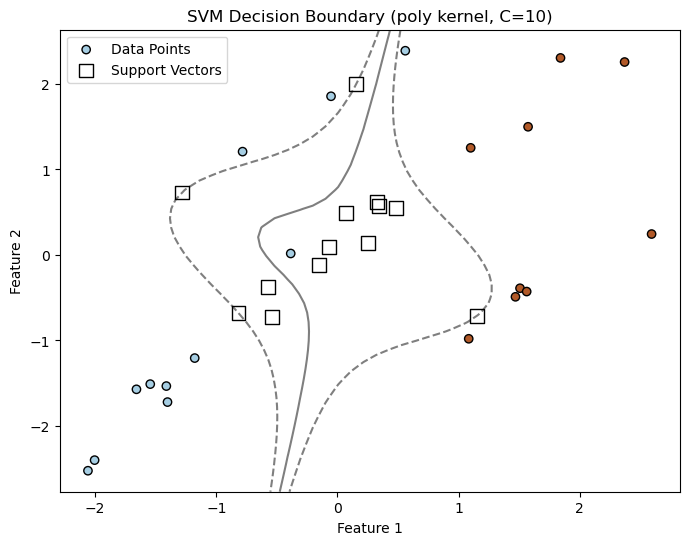

C:\Users\vakit\AppData\Local\Temp\ipykernel_26636\2642946139.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')


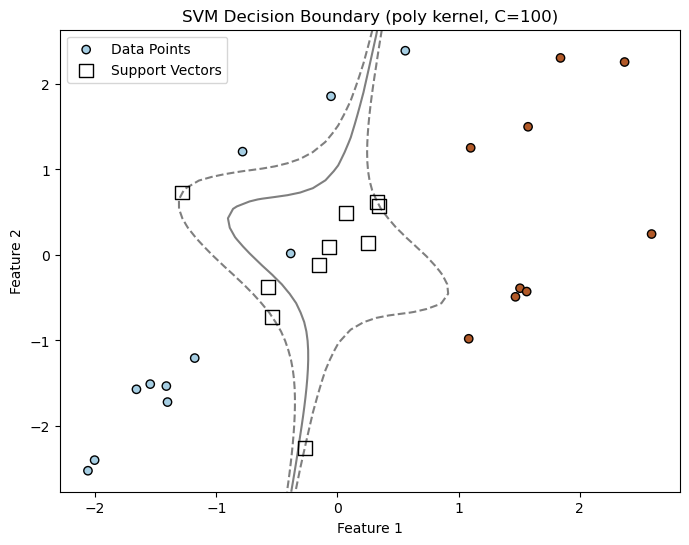

C:\Users\vakit\AppData\Local\Temp\ipykernel_26636\2642946139.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')


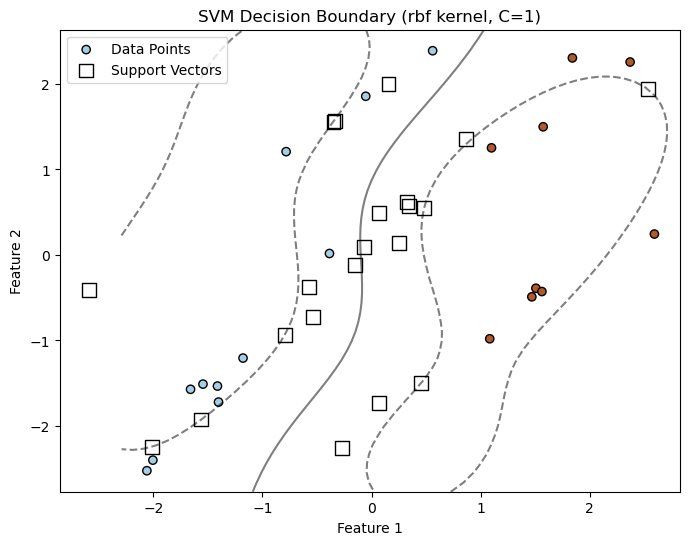

C:\Users\vakit\AppData\Local\Temp\ipykernel_26636\2642946139.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')


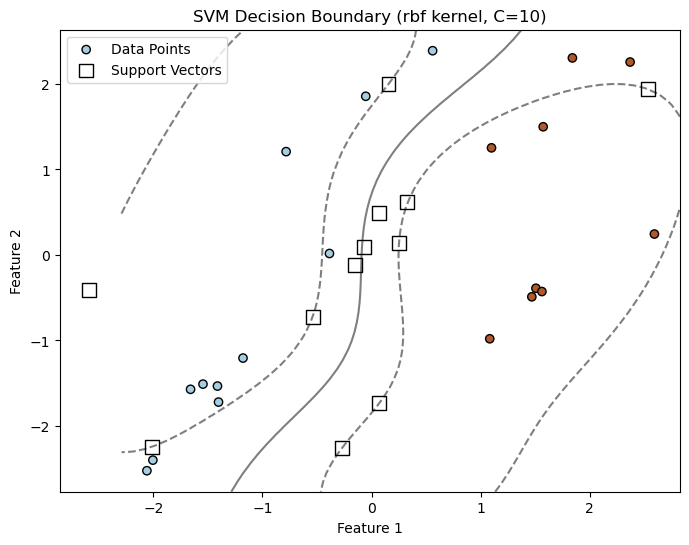

C:\Users\vakit\AppData\Local\Temp\ipykernel_26636\2642946139.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')


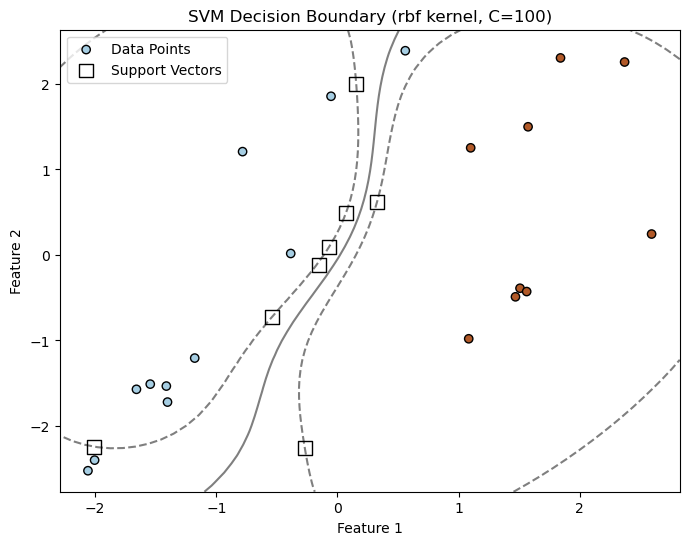

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X = product_dfv1[['price', 'listPrice', 'rating', 'totalReviews', 'isPrimeEligible']]
y = product_dfv1['isPrimeEligible']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define kernels and C values
kernels = ['linear', 'poly', 'rbf']
C_values = [1, 10, 100]

# Initialize a dictionary to store results for each kernel
results = {}

# Loop over kernels
for kernel in kernels:
    # Initialize a dictionary for results with this kernel
    kernel_results = {}
    
    # Loop over C values
    for C in C_values:
        # Initialize SVM classifier
        svm_classifier = SVC(kernel=kernel, C=C)
        
        # Train the model
        svm_classifier.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = svm_classifier.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Visualize decision boundary, support vectors, and data points
        plt.figure(figsize=(8, 6))
        
        # Plot the data points
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', marker='o', label='Data Points')
        
        # Plot the decision boundary
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
        Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')
        
        # Plot support vectors
        plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', marker='s', label='Support Vectors')
        
        plt.title(f'SVM Decision Boundary ({kernel} kernel, C={C})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
        
        # Save results in the dictionary
        kernel_results[C] = {'Accuracy': accuracy, 'ConfusionMatrix': conf_matrix}
    
    # Save results for this kernel in the main dictionary
    results[kernel] = kernel_results


# SVM for Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Assuming df contains the relevant numeric features and the target variable 'price'
X = product_dfv1['totalReviews'] # Add more features if needed
y = product_dfv1['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVR model
svr = SVR(kernel='linear', C=1.0)

In [7]:
# Train the model
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_true, y_pred)

# Print the MAE
print(f'Mean Absolute Error (MAE): {mae}')

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

NameError: name 'mean_absolute_error' is not defined

Mean Absolute Error (MAE): 4.374160599698331


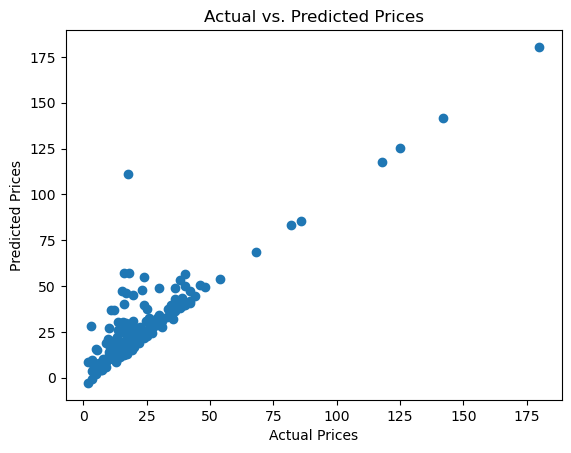

Mean Squared Error: 98.7716226210652
R-squared: 0.7512667173278587
Mean Absolute Error: 4.374160599698331


In [9]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')